# Приоритизация и проверка гипотез.

Отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки. Также был проведён А/В-тест и получены результаты, требующие дальнейшего анализа.

**Задачи:**
* приоритизировать представленные гипотезы и выбрать наиболее перспективные;
* проанализировать результаты проведённого А/В-теста;
* принять решение на основе полученных результатов.


**План исследования:**
* изучить полученные данные о гипотезах, заказах и пользователях;
* выполнить предобработку данных;
* приоритизировать гипотезы с применением фреймворка ICE;
* приоритизировать гипотезы с применением фреймворка RICE; 
* построить график кумулятивной выручки по группам;
* построить график кумулятивного среднего чека по группам;
* построить график относительного изменения кумулятивного среднего чека группы B к группе A;
* построить график кумулятивного среднего количества заказов на посетителя по группам;
* построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
* построить точечный график количества заказов по пользователям;
* посчитать 95-й и 99-й перцентили количества заказов на пользователя;
* построить точечный график стоимостей заказов;
* посчитать 95-й и 99-й перцентили стоимости заказов;
* посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
* посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
* посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
* посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
* сделать вывод по полученным результатам.

**Описание данных:**

Файл *hypothesis* содержит следующие данные:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл *orders* содержит следующие данные:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл *visitors* содержит следующие данные:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.





### Подготовка данных к анализу.

#### Импорт библиотек и выгрузка данных.


In [1]:
# Импортируем библиотеки

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt

In [2]:
# Загружаем данные 

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Общее знакомство с данными.

In [3]:
# Знакомимся с данными в таблице гипотез.

pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Знакомимся с данными в таблице заказов.

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
# Проверим таблицу на наличие полных дубликатов.

orders.duplicated().sum()

0

In [8]:
# Проверим таблицу на наличие пропусков.

orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
# Определим количество уникальных пользователей, сделавших заказы.

orders['visitorId'].nunique()

1031

In [10]:
# Определим количество уникальных пользователей, сделавших заказы, по группам.

orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

**!** Всего в таблице 1031 уникальный пользователь. Но если их разбить на группы, то получается в сумме 1089. Необходимо проверить, присутствуют ли одни и те же пользователи в обеих группах.

In [11]:
# Проверим, присутствуют ли пересечения в группах А и В по visitorId

intersections = set(orders.query('group == "A"')['visitorId'])&set(orders.query('group == "B"')['visitorId'])
intersections

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

In [12]:
# Количество пользователей, находящихся одновременно в группах А и В.

len(intersections)

58

In [13]:
# Определим, какую часть от всех пользователей составляют повторяющиеся пользователи.

intersections_share = (len(intersections)/orders['visitorId'].nunique())*100
round(intersections_share,2)

5.63

При проверке на наличие одинаковых visitorId в двух группах выяснилось, что такие пользователи имеются, и их количество составляет 58 человек - 5.63% от общего количества уникальных пользователей. При корректном проведении А/В-теста подобные ситуации должны быть исключены на этапе А/А-теста. Значит, подготовка к тесту не была проведена должным образом. 

Удалим пересекающихся пользователей из orders, чтобы не искажать результаты.


In [14]:
# Удалим пересекающихся пользователей из orders, чтобы минимизировать искажения в результатах анализа.

orders = orders.query('visitorId not in @intersections')

In [15]:
# Знакомимся с содержимым таблицы visitors.

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
# Проверим, какое количество посетителей было в каждой группе за весь период теста.

visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [18]:
round((1 - visitors.query('group =="A"')['visitors'].sum()/visitors.query('group =="B"')['visitors'].sum())*100, 2)

0.95

Разница между количеством посетителей в группах составляет менее 1 процента.

In [19]:
visitors.duplicated().sum()

0

In [20]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

#### Преобразование названий столбцов и типов данных.

In [21]:
# Приведём названия столбцов в таблице hypothesis к нижнему регистру.

hypothesis.columns = hypothesis.columns.str.lower()

In [22]:
# Изменим тип данных в столбцах с датами.

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [23]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [62]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Выводы по разделу.


* В целях проведения исследования нами было получено три файла (hypothesis, orders, visits) с информацией о гипотезах для увеличения выручки а также с результатами А/В-теста и информацией о пользователях, покупках, группах, датах посещения магазина, датах покупок.

* При знакомстве с данными о гипотезах, выяснилось, что всего выдвинуто 9 гипотез для увеличения выручки магазина. В файле имеется информация с параметрами Reach, Impact, Confidence, Efforts, необходимыми для приоритизации гипотез методами ICE и RICE. Пропуски в данных отсутствуют.

* В таблице orders 5 колонок с информацией о номере заказа, номере пользователя, дате заказа, сумме заказа, группе (А или В). Полных дубликатов и пропусков в таблице нет. При проверке на наличие одинаковых visitorId в двух группах выяснилось, что такие пользователи имеются, и их количество составляет 58 человек - 5.63% от общего количества уникальных пользователей. Подготовка к тесту не была проведена должным образом. Пересекающиеся пользователи были удалены.

* Таблица visitors содержит информацию о дате, группе и количестве посетителей в группе. Разница между количеством посетителей в группах за весь период теста составляет менее 1 процента. Полных дубликатов и пропусков в таблице нет.

* Названия столбцов в таблице hypothesis были приведены к нижнему регистру.
* В столбцах с датами тип данных был изменен на datetime.

### Приоритизация гипотез.

#### Метод ICE

In [25]:
# Применим фреймворк ICE для приоритизации гипотез.

hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2) 

In [26]:
# Отсортируем результаты в порядке убывания.

hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно результатам, наиболее перспективными гипотезами являются:
* 8 - Запустить акцию, дающую скидку на товар в день рождения
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

#### Метод RICE

In [27]:
# Применим фреймворк RICE для приоритизации гипотез.

hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'] 

In [28]:
# Отсортируем результаты в порядке убывания.

hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Полученные результаты говорят о том, что наиболее перспективными являются гипотезы:
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - и 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

#### Выводы по разделу.

1. Метод приоритизации гипотез ICE показал, что наиболее перспективными для исследования являются гипотезы:
* 8 - Запустить акцию, дающую скидку на товар в день рождения
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2. Метод приоритизации гипотез RICE показал, что наиболее перспективными для исследования являются гипотезы:
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - и 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

3. Список перспективных гипотез, определённых методом RICE, несколько отличается от тех, что были выделены методом ICE. На первом месте оказалась гипотеза №7, на втором месте появилась гипотеза №2, гипотеза №0  переместилась со второй строчки на третью. Гипотеза №7 смогла выйти на топовую позицию благодаря самому высокому показателю критерия Reach (10), отражающего количество пользователей, которых затронет планируемое изменение. Гипотеза №2 также поднялась на более высокое место благодаря критерию Reach в 8 баллов. Гипотеза №0 сместилась на третью позицию ввиду более низкого показателя Reach (3), однако высокие показатели критериев Impact (10) и Confidence (8) позволили ей остаться в тройке лидеров.

4. С учётом полученных результатов можно говорить о том, что гипотезы заслуживающие первостепенного внимания являются гипотезы 7 и 0, вошедшие в топ-3 результатов при использовании обоих методов приоритизации.

### Анализ A/B-теста.

#### График кумулятивной выручки по группам.

In [29]:
# создаем массив уникальных пар значений дат и групп теста.

datesGroups = orders[['date','group']].drop_duplicates() 


In [30]:
# получаем агрегированные кумулятивные по дням данные о заказах. 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                              .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
                              .sort_values(by=['date','group'])


In [31]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [32]:
# получаем агрегированные кумулятивные по дням данные о посетителях. 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])


In [33]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [34]:
# объединяем кумулятивные данные в одной таблице. 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [35]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [36]:
# Проверим корректность датафрейма cummulativeData:
# сравним, совпадают ли минимальная и максимальная даты датафрейма с исходныит данными.

if cumulativeData['date'].min() == orders['date'].min() == visitors['date'].min():
    print('Минимальные даты в данных совпадают.')
else:
    print('Минимальные даты в данных не совпадают.')

Минимальные даты в данных совпадают.


In [37]:
if cumulativeData['date'].max() == orders['date'].max() == visitors['date'].max():
    print('Максимальные даты в данных совпадают.')
else:
    print('Максимальные даты в данных не совпадают.')

Максимальные даты в данных совпадают.


Датафрейм cummulativeData создан корректно.

In [38]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А.

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B.

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


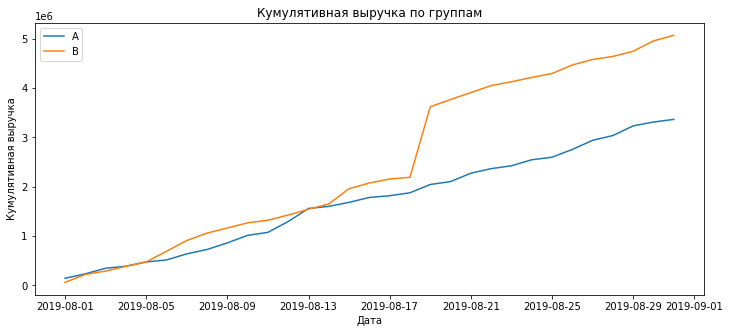

In [40]:
# Строим график кумулятивной выручки групп А и В.

plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.show();

**Выводы.** Выручка в обеих группах увеличивалась на протяжении всего теста. В группе А наблюдается небольшой скачок в выручке  13.08.2019 - в этот день показатели групп сравнялись. В районе 19.08.2019 у группы В наблюдается резкий скачок, а далее выручка стабильно держится на более высоких значениях по сравнению с группой А. Скачки в показателях обеих групп могут быть связаны с наличием выбросов - аномально крупных заказов в отмеченные даты. После 19.08 показатели в обеих группах стабилизируются, и резких скачков более не наблюдается. Видимо, число полученных наблюдений оказалось достаточным, чтобы по закону больших чисел значения показателей приблизились к ожидаемым. Результаты дают возможность предположить, что изменения тестируемые на группе В будут более успешными для компании.

#### График кумулятивного среднего чека по группам.

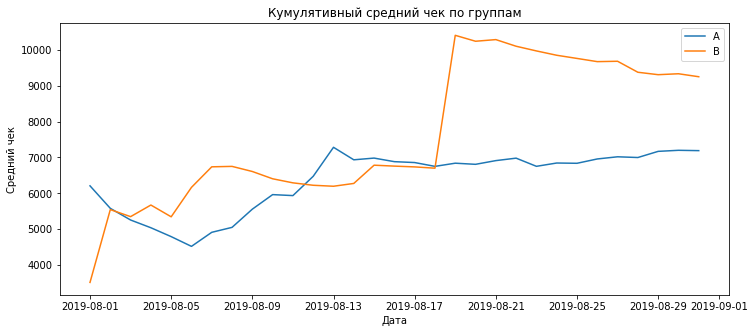

In [41]:
# Строим графики среднего чека по группам.

plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек'); 


**Выводы.** Примерно до 18.08 показатели обеих групп подвержены заметным колебаниям. Примерно с 3.08 по 11.08 в лидерах находится группа В, после чего показатели сравниваются, и группа А начинает лидировать до 18.08. Как и на графике выручки, в группе В виден резкий скачок в среднем чеке в районе 19.08.2019, а далее стабильно более высокие показатели значения среднего чека на протяжении последующих дней теста относительно А. Колебания в обеих группах могут быть связаны с появлением аномальных заказов. Значения стабилизируются ближе к окончанию теста. Таким образом, и график среднего чека по группам позволяет предположить большую успешность группы В. 

#### График относительного различия для кумулятивного среднего чека.

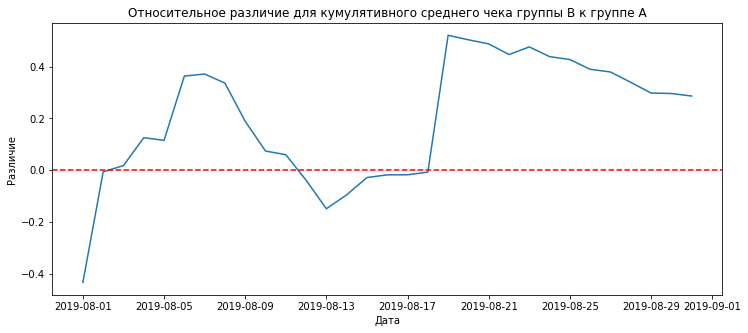

In [42]:
# Собираем кумулятивные данные в одном датафрейме 
# и строим график относительного изменения кумулятивного среднего чека группы B к группе A.

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.title('Относительное различие для кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Различие')
plt.show(); 

**Выводы.** По графику видно, что на протяжении практически всего времени показатели группы В были значительно лучше, уступив  немного группе А только в самом начале теста и в районе 13.08.2019 - 18.08.2019. В целом, и этот график позволяет предположить, что изменения тестируемые на группе В являются более результативными.

#### График кумулятивного среднего количества заказов на посетителя по группам.

In [43]:
# Считаем кумулятивную конверсию.

cumulativeData['conversion'] = round(cumulativeData['orders']/cumulativeData['visitors'],3)

In [44]:
# Отделяем пользователей группы А.

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [45]:
# Отделяем пользователей группы B.

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

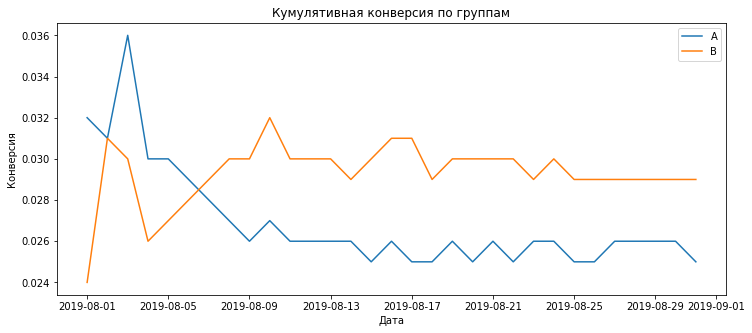

In [46]:
# строим графики кумулятивного среднего количества заказов на посетителя.

plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show();


В начале исследования результаты группа А по кумулятивному среднему количеству заказов на посетителя были лучше, но, примерно после 06.08 показатели группы В стали более высокими, и группа сохранила лидирующую позицию до последнего дня теста.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [47]:
#  Объединим данные по конверсиям двух групп.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])



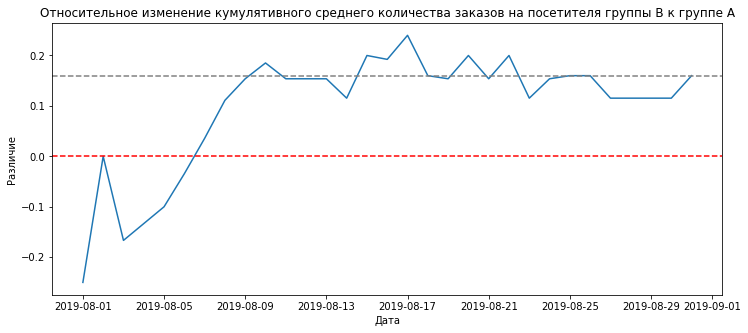

In [48]:
# Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Различие')
plt.show();



Начиная примерно с 06.08.2019 группа В показывает стабильно лучшие результаты по сравнению с группой А. К концу теста зафиксирован прирост в кумулятивном среднем количетсве заказов на посетителя в районе 16% относительно группы А.

#### Точечный график количества заказов по пользователям.

In [49]:
# Считаем количество заказов по пользователям.

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']


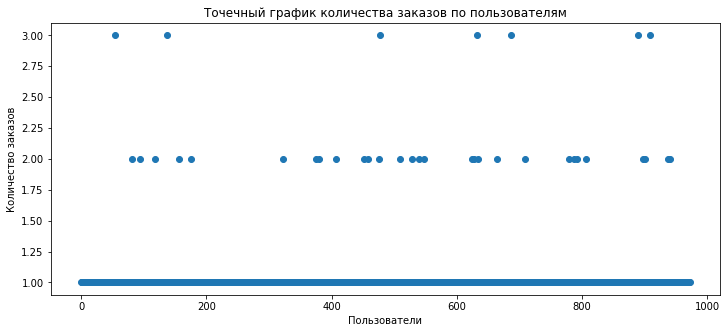

In [50]:
# Строим точечный график количества заказов по пользователям.

plt.figure(figsize=(12, 5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show();


По графику видно, что большинство пользователей совершило 1 покупку. 

#### Перцентили количества заказов на пользователя.

In [51]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя.

np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформили больше чем 1 заказ. Лишь 1% пользователей сделал более 2 заказов. Возьмём 2 заказа на одного пользователя за верхнюю границу числа заказов, чтобы в итоге не удалить более 5% данных при дополнительной фильтрации по сумме заказа.

#### Точечный график стоимостей заказов.

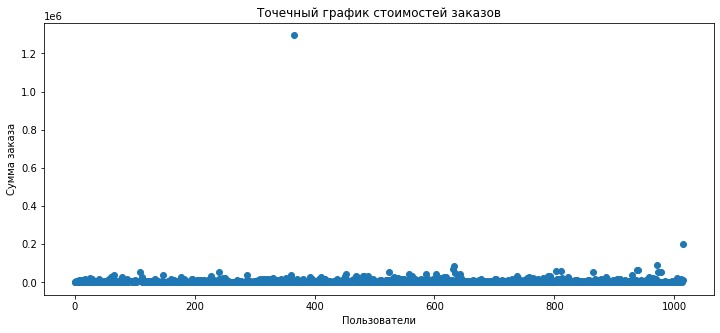

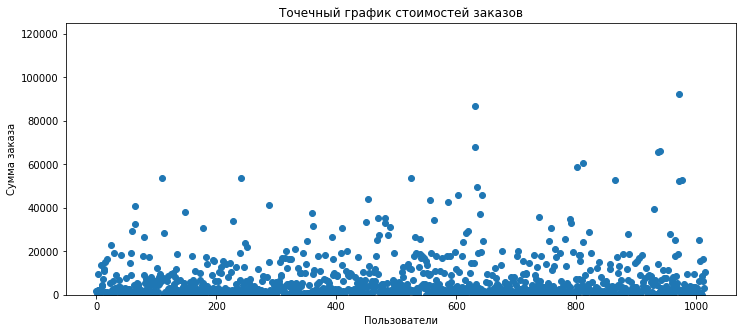

In [52]:
# Строим точечный график стоимостей заказов.

plt.figure(figsize=(12, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')

plt.figure(figsize=(12, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 125000)

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')

plt.show();


Один из заказов является абсолютным лидеров среди выбросов (примерно 1300000). Также есть крупный заказа примерно на 200000, который тоже выбивается среди остальных. Эти два выброса могут сильно влиять на результаты расчётов. При более детальном рассмотрении видно, что стоимость большей части заказов не превышает 20000.

#### 95-й и 99-й перцентили стоимости заказов. 

In [53]:
# Посчитаем выборочные перцентили стоимости заказов.

np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26785 и не более 1% заказов дороже 53904. Для дальнейшего анализа можно принять пользователей совершивших покупки на более чем 26785 аномальными.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

**Нулевая гипотеза:** статистически значимых различий в среднем числе заказов между группами нет.

**Альтернативная гипотеза:** статистически значимые различия в среднем числе заказов между группами есть.

In [54]:
# Считаем количество заказов по пользователям и группам.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


In [55]:
# Создадим переменные по группам
# с числом заказов определённого пользователя, в том числе ноль.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left')

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
            .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
            .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

# Выводим p-value после проверки критерием  Манна-Уитни.
print('p-value: '"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

if st.mannwhitneyu(sampleA, sampleB)[1] < 0.05:
    print('Принимаем альтернативную гипотезу: статистически значимые различия в среднем числе заказов между группами есть.')
else:
    print('Принимаем нулевую гипотезу: статистически значимых различий в среднем числе заказов между группами нет.')

# Выводим относительный прирост среднего числа заказов группы B.
print('Относительный прирост среднего числа заказов группы B: '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.011
Принимаем альтернативную гипотезу: статистически значимые различия в среднем числе заказов между группами есть.
Относительный прирост среднего числа заказов группы B: 0.160


**Выводы:** p-value = 0.011, что меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительное превосходство группы В составляет 16%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Нулевая гипотеза:** различий в среднем чеке между группами нет.

**Альтернативная гипотеза:** статистически значимые различия в среднем чеке между группами есть.

In [56]:
# Выводим p-value после проверки критерием  Манна-Уитни.

print('p-value: ''{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

if st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < 0.05:
    print('Принимаем альтернативную гипотезу: статистически значимые различия в среднем чеке между группами есть.')
else:
    print('Принимаем нулевую гипотезу: различий в среднем чеке между группами нет.')
    
# Выводим относительные различия в среднем чеке между группами.
print('Относительный прирост среднего числа заказов группы B: ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value: 0.829
Принимаем нулевую гипотезу: различий в среднем чеке между группами нет.
Относительный прирост среднего числа заказов группы B: 0.287


**Выводы:** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Между тем, средний чек группы B значительно выше среднего чека группы А - 28.7%. При полученном уровне значимости наблюдаемые различия в среднем чеке двух групп не являются значимыми, а значит, были получены случайно.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [57]:
# Создаём данные, очищенные от выбросов.
# Взяв во внимание найденные ранее перцентили, определим аномальных пользователей как тех, кто
# совершил более 2 заказов на сумму более 26785.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
58


Всего в данных 58 аномальных пользователей.

In [58]:
# Определим долю аномальных пользователей среди всех пользователей, сделавших заказы.

round(abnormalUsers.shape[0]/orders['visitorId'].nunique()*100, 2)

5.96

Доля аномальных пользователей составляет 5.96%.

In [59]:
# Готовим выборки количества заказов по пользователям по группам теста.

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
                    .isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                    .sum() - len(ordersByUsersA['orders'])), name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
                    .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                    .sum() - len(ordersByUsersB['orders'])), name='orders',),], axis=0,) 


In [60]:
# Выводим p-value после проверки критерием  Манна-Уитни.

print('p-value: ''{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < 0.05:
    print('Принимаем альтернативную гипотезу: статистически значимые различия в среднем числе заказов между группами есть.')
else:
    print('Принимаем нулевую гипотезу: статистически значимых различий в среднем числе заказов между группами нет.')
    

# Выводим относительный прирост среднего числа заказов группы B.

print('Относительный прирост среднего числа заказов группы B: ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-value: 0.012
Принимаем альтернативную гипотезу: статистически значимые различия в среднем числе заказов между группами есть.
Относительный прирост среднего числа заказов группы B: 0.182


После удаления выбросов значение p-value стало ещё ниже , а значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы действительно отвергаем.  Более того, относительное превосходство группы В по отношению к группе А увеличилось более чем на 2%.

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [61]:
# Выводим p-value после проверки критерием  Манна-Уитни.

results = round(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId']\
              .isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B',\
              np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1], 3)

print('p-value:', results)

if results < 0.05:
    print('Принимаем альтернативную гипотезу: статистически значимые различия в среднем чеке между группами есть.')
else:
    print('Принимаем нулевую гипотезу: различий в среднем чеке между группами нет.')

    
# Выводим относительный прирост среднего чека группы B.

print('Относительный прирост среднего числа заказов группы B: ''{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId']\
               .isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

p-value: 0.646
Принимаем нулевую гипотезу: различий в среднем чеке между группами нет.
Относительный прирост среднего числа заказов группы B: -0.048


После проведения проверки критерием Манна-Уитни на очищенных данных p-value немного снизился. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Между тем, относительный разрыв между средним чеком группы В и группы А изменился. Согласно очищенным данным, группа В уступает группе А на 4.8%.

#### **Выводы по разделу.**

* График кумулятивной выручки по группам показывает, что на протяжении всего теста данный показатель в обеих группах рос.  Однако, примерно с серидины теста группа В вышла в лидеры и показывала стабильно более высокие результаты относительно группы А. 


* Графики кумулятивного среднего чека также становятся более стабильными к концу теста. Между тем, на протяжении теста в обеих группах наблюдались резкие всплески, что может быть связано с появлением крупных заказов. Начиная примерно с серидины теста группа В опережает группу А по данному показателю. 


* График относительного изменения для кумулятивного среднего чека показывает, что на протяжении практически всего теста  показатели группы В были значительно лучше относительно группы А.


* График кумулятивного среднего количества заказов на посетителя по группам показывает, что в самом начале теста результаты группы А по кумулятивному среднему количеству заказов на посетителя были лучше, но, спустя примерно неделю показатели группы В стали более высокими, и группа сохраняла лидирующую позицию до последнего дня теста.


* График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показывает, что примерно через неделю после начала теста группа В стабильно показывала лучшие результаты. К концу теста зафиксирован прирост в кумулятивном среднем количетсве заказов на посетителя в районе 14% относительно группы А.



* Точечный график количества заказов по пользователям показывает, что большинство посетителей совершило 1 покупку. Также много пользователей с 2 покупками.


* 95 и 99 перцентили количества заказов на пользователя составляют 1 и 2 соответственно, т.е. не более 5% пользователей оформили больше чем 1 заказ и лишь 1% пользователей сделал более 2 заказов. 


* Точечный график стоимостей заказов показывает, что один заказа является абсолютным лидеров среди выбросов (примерно 1300000). Также есть крупный заказа примерно на 200000, который тоже выбивается среди остальных. 


* 95 и 99 перцентили количества заказов на пользователя составляют 26785 и 53904 соответственно.


* Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным показал, что различия по этому параметру имеются. p-value = 0.011, а значит, нулевая гипотеза о равенстве в среднем количестве заказов отвергается. Более того, относительное превосходство группы В составило 16%.


* Подсчёт статистической значимости различий в среднем чеке заказа между группами А и В по «сырым» данным показал, что различий в данном параметре нет. p-value значительно больше 0.05, нулевая гипотеза о равенстве средних чеков заказов принимается. Между тем, в относительном отношении средний чек группы B значительно выше среднего чека группы А.


* Был проведён подсчёт аномальных пользователей - тех, кто совершил более 2 покупок на сумму более 30000. Их количество составило 68 человек - 6.6% от общего числа пользователей, совершивших покупки.


* Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным подтвердил результаты, полученные по сырым данным. Нулевая гипотеза о равенстве в среднем количестве заказов отвергается. p-value стал ещё ниже - 0.010. Более того, относительное превосходство группы В по отношению к группе А увеличилось более чем на 2%.


* Подсчёт статистической значимоси различий в среднем чеке заказа между группами по «очищенным» данным подтвердил результаты проверки по сырым данным - нулевая гипотеза о равенстве средних чеков заказов в двух группах принимается. p-value немного снизился. Однако, относительное развличие среднего чека группы В относительно группы А изменилось. Согласно очищенным данным группа В уступает группе А на 4.8%. 





### Общие выводы.

В целях определения наиболее перспективных гипотез по увеличению выручки в данном исследовании была проведена приоритизация гипотез с использованием методов ICE и RICE, а также был произведён анализ результатов проведённого А/В-теста. 

Первичное знакомство с данными и приоритизация методами ICE и RICE позволили сделать следующие выводы:

* В таблице hypothesis имеется информация о 9 гипотезах об увеличении выручки, для каждой из которых определены параметры Reach, Impact, Confidence, Efforts. В таблице orders находится информация о совершённых покупках с данными о номере заказа, номере пользователя, дате заказа, сумме заказа, группе (А или В). При проверке на наличие одинаковых visitorId в двух группах выяснилось, что такие пользователи имеются, и их количество составляет 58 человек - 5.63% от общего количества уникальных пользователей. Пересекающиеся пользователи были удалены из данных. При корректном проведении А/В-теста подобные ситуации должны быть исключены на этапе А/А-теста. В таблице visitors содержится информацию о дате, группе и количестве посетителей в группе. Разница между количеством посетителей в группах за весь период теста составляет менее 1 процента. 


* При определении наиболее перспективных гипотез с использованием метода ICE были выделены следующие гипотезы:
 8 - Запустить акцию, дающую скидку на товар в день рождения;
 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
 

* При определении наиболее перспективных гипотез с использованием метода RICE были выделены следующие гипотезы:
 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - и 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
 

* С учётом полученных результатов можно говорить о том, что гипотезы заслуживающие первостепенного внимания являются гипотезы 7 и 0, вошедшие в топ-3 результатов при использовании обоих методов приоритизации.


Анализ результатов А/В-теста позволили сделать следующие выводы:

* кумулятивная выручка группы В стабильно выше кумулятивной выручки группы А;
* кумулятивный средний чек группы В становится стабильно более высоким относительно группы А примерно с серидины теста;
* на протяжении практически всего теста  показатели группы В в относительном изменении для кумулятивного среднего чека были значительно лучше относительно группы А;
* спустя примерно неделю кумулятивное среднее количество заказов на посетителя группы В стали более высокими, и группа сохраняла лидирующую позицию до последнего дня теста;
* относительное изменение кумулятивного среднего количества заказов на посетителя группы B стало стабильно лучше примерно через неделю после начала теста. К концу теста зафиксирован прирост в кумулятивном среднем количестве заказов на посетителя в районе 14% относительно группы А;
* не более 5% пользователей оформили больше чем 1 заказ и лишь 1% пользователей сделал более 2 заказов.
* 5% пользователей совершили заказы на более чем 26785 и 1% - на более чем 53904.
* проверка критерием Манна-Уитни показала, что нулевая гипотеза о равенстве в среднем количестве заказов по сырым данным отвергается. Более того, относительное превосходство группы В составляет 16%;
* нулевая гипотеза о равенстве средних чеков заказов по сырым данным принимается, но в относительном отношении средний чек группы B значительно выше;
* аномальных пользователей - сделавших более 2 заказов на сумму более 26785 - 58 человек - 5.96% от общего числа пользователей, совершивших покупки;
* по "очищенным данным" нулевая гипотеза о равенстве в среднем количестве заказов также отвергается. p-value стал ещё ниже, а  относительное превосходство группы В по отношению к группе А увеличилось более чем на 2%;
* по "очищенным данным" нулевая гипотеза о равенстве средних чеков заказов в двух группах также принимается. p-value немного снизился, однако, теперь группа В уступает группе А на 4.8%.

Приняв во внимание результаты анализа А/В-теста, а так же тот факт, что изменение исследуемых показателей стабилизировалось, рекомендуем остановить тест и признать победу за группой В. 













